In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import math
from eif import IsolationForest
from sklearn.datasets import make_moons

/home/robert/anaconda3/envs/aienv/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [8]:
def generate_donut_data(n_samples=1000, inner_radius=2.0, outer_radius=5.0):
    r = np.random.rand(n_samples) * (outer_radius - inner_radius) + inner_radius
    theta = np.random.rand(n_samples) * 2 * np.pi
    
    X = np.empty((n_samples, 2))
    X[:, 0] = r * np.cos(theta)
    X[:, 1] = r * np.sin(theta)

    return X

def generate_spiral(n_samples=1000, noise=0.2):
    t = np.linspace(0, 4*np.pi, n_samples)
    x = t * np.cos(t) + np.random.randn(n_samples) * noise
    y = t * np.sin(t) + np.random.randn(n_samples) * noise
    return np.c_[x, y]

In [4]:
X1 = np.random.randn(500, 2)
X2 = np.random.randn(500, 2) + 10
X3 = np.random.randn(500, 2) + 20
X = np.vstack([X1, X2, X3])

In [ ]:
x = np.random.rand(1000) * 8 * np.pi
y = np.sin(x) + np.random.randn(1000) / 4
X = np.c_[x, y]

In [104]:
model = IsolationForest(n_trees=100, sample_size=500, tree_type="extended", tree_args={"extension_level": 1})
model.fit(X)

Fitting Isolation Forest: 100%|██████████| 100/100 [00:00<00:00, 118.59it/s]


Computing path lengths: 100%|██████████| 1500/1500 [00:02<00:00, 746.08it/s]


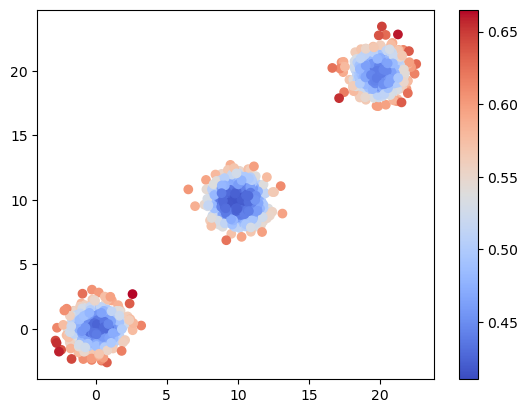

In [105]:
scores = model.anomaly_score(X)
plt.scatter(X[:, 0], X[:, 1], c=scores, cmap="coolwarm")
plt.colorbar()
plt.show()

Computing path lengths: 100%|██████████| 10000/10000 [00:08<00:00, 1187.38it/s]


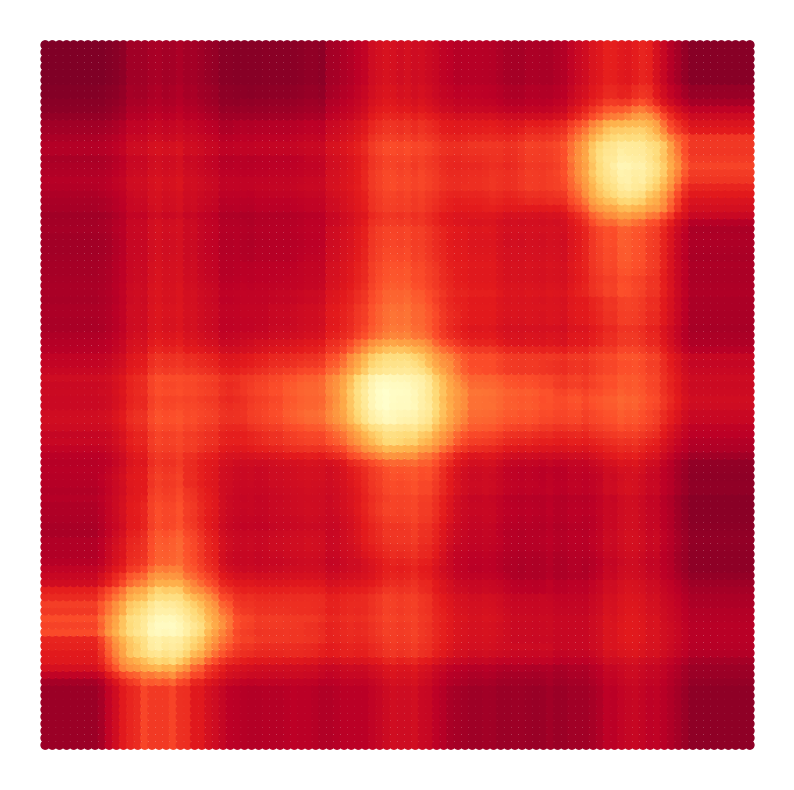

In [108]:
x = np.linspace(-5, 25, 100)
y = np.linspace(-5, 25, 100)

xx, yy = np.meshgrid(x, y)
grid = np.c_[xx.ravel(), yy.ravel()]

scores = model.anomaly_score(grid)

plt.figure(figsize=(10, 10))
plt.scatter(grid[:, 0], grid[:, 1], c=scores, cmap=plt.cm.YlOrRd)
plt.axis("off")
plt.savefig("three_clusters.png")

In [34]:
def evaluate_model(model, X, offset=2, save_path="image.png"):
    model.fit(X)
    original_scores = model.anomaly_score(X)
    xmn = np.min(X[:, 0])
    xmx = np.max(X[:, 0])
    ymn = np.min(X[:, 1])
    ymx = np.max(X[:, 1])
    x = np.linspace(xmn - offset, xmx + offset, 100)
    y = np.linspace(ymn - offset, ymx + offset, 100)
    xx, yy = np.meshgrid(x, y)
    grid = np.c_[xx.ravel(), yy.ravel()]
    scores = model.anomaly_score(grid)
    
    
    # plt.scatter(grid[:, 0], grid[:, 1], c=scores, cmap=plt.cm.YlOrRd)
    # plt.axis("off")
    # plt.savefig(save_path)
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].scatter(X[:, 0], X[:, 1])
    ax[0].set_title("Original Data")
    ax[0].axis("off")
    ax[1].scatter(X[:, 0], X[:, 1], c=original_scores, cmap="coolwarm")
    ax[1].set_title("Anomaly Scores")
    ax[1].axis("off")
    ax[2].scatter(grid[:, 0], grid[:, 1], c=scores, cmap=plt.cm.YlOrRd)
    ax[2].set_title("Heatmap")
    ax[2].axis("off")
    plt.savefig(save_path)
    return grid, scores

Computing path lengths: 100%|██████████| 10000/10000 [00:07<00:00, 1296.41it/s]


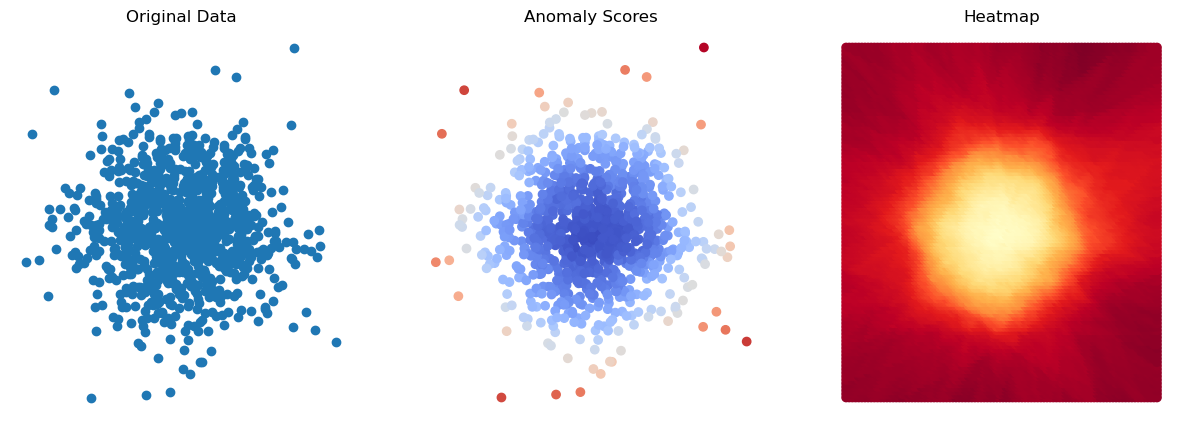

In [35]:
X = np.random.randn(1000, 2)
model = IsolationForest(n_trees=100, sample_size=500, tree_type="extended", tree_args={"extension_level": 2})
grid, scores = evaluate_model(model, X, save_path="random_data_full.png")



In [ ]:
X = np.random.randn(1000, 2)

model = IsolationForest(n_trees=300, sample_size=500, tree_type="extended", tree_args={"extension_level": 2})
grid_1, scores_1 = evaluate_model(model, X)

X1 = np.random.randn(500, 2)
X2 = np.random.randn(500, 2) + 10
X3 = np.random.randn(500, 2) + 20
X = np.vstack([X1, X2, X3])

model = IsolationForest(n_trees=300, sample_size=500, tree_type="extended", tree_args={"extension_level": 2})
grid_2, scores_2 = evaluate_model(model, X)

x = np.random.rand(1000) * 8 * np.pi
y = np.sin(x) + np.random.randn(1000) / 4
X = np.c_[x, y]

model = IsolationForest(n_trees=300, sample_size=500, tree_type="extended", tree_args={"extension_level": 2})
grid_3, scores_3 = evaluate_model(model, X)

X, _ = make_moons(n_samples=1000, noise=0.1, random_state=42)
model = IsolationForest(n_trees=300, sample_size=500, tree_type="extended", tree_args={"extension_level": 2})
grid_4, scores_4 = evaluate_model(model, X)

X = generate_donut_data(n_samples=1000, inner_radius=4.0, outer_radius=6.0)
model = IsolationForest(n_trees=300, sample_size=500, tree_type="extended", tree_args={"extension_level": 2})
grid_5, scores_5 = evaluate_model(model, X)

X = generate_spiral()
model = IsolationForest(n_trees=300, sample_size=500, tree_type="extended", tree_args={"extension_level": 2})
grid_6, scores_6 = evaluate_model(model, X)

# create a 3x2 grid of subplots with the heatmaps
# fig, ax = plt.subplots(3, 2, figsize=(10, 15))
# ax[0, 0].scatter(grid_1[:, 0], grid_1[:, 1], c=scores_1, cmap=plt.cm.YlOrRd)
# ax[0, 0].set_title("Random Data")
# ax[0, 0].axis("off")
# ax[0, 1].scatter(grid_2[:, 0], grid_2[:, 1], c=scores_2, cmap=plt.cm.YlOrRd)
# ax[0, 1].set_title("Two Clusters")
# ax[0, 1].axis("off")
# ax[1, 0].scatter(grid_3[:, 0], grid_3[:, 1], c=scores_3, cmap=plt.cm.YlOrRd)
# ax[1, 0].set_title("Sine Wave")
# ax[1, 0].axis("off")
# ax[1, 1].scatter(grid_4[:, 0], grid_4[:, 1], c=scores_4, cmap=plt.cm.YlOrRd)
# ax[1, 1].set_title("Moons")
# ax[1, 1].axis("off")
# ax[2, 0].scatter(grid_5[:, 0], grid_5[:, 1], c=scores_5, cmap=plt.cm.YlOrRd)
# ax[2, 0].set_title("Donut")
# ax[2, 0].axis("off")
# ax[2, 1].scatter(grid_6[:, 0], grid_6[:, 1], c=scores_6, cmap=plt.cm.YlOrRd)
# ax[2, 1].set_title("Spiral")
# ax[2, 1].axis("off")
# plt.tight_layout()
# plt.savefig("isolation_forest_anomaly_detection.png")

Computing path lengths: 100%|██████████| 10000/10000 [00:37<00:00, 270.03it/s]


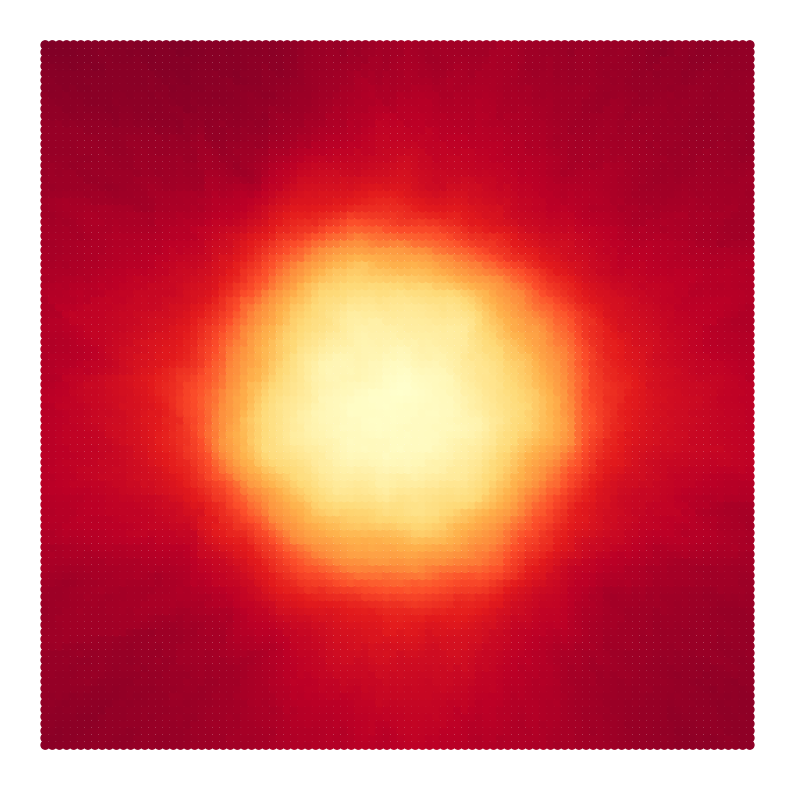

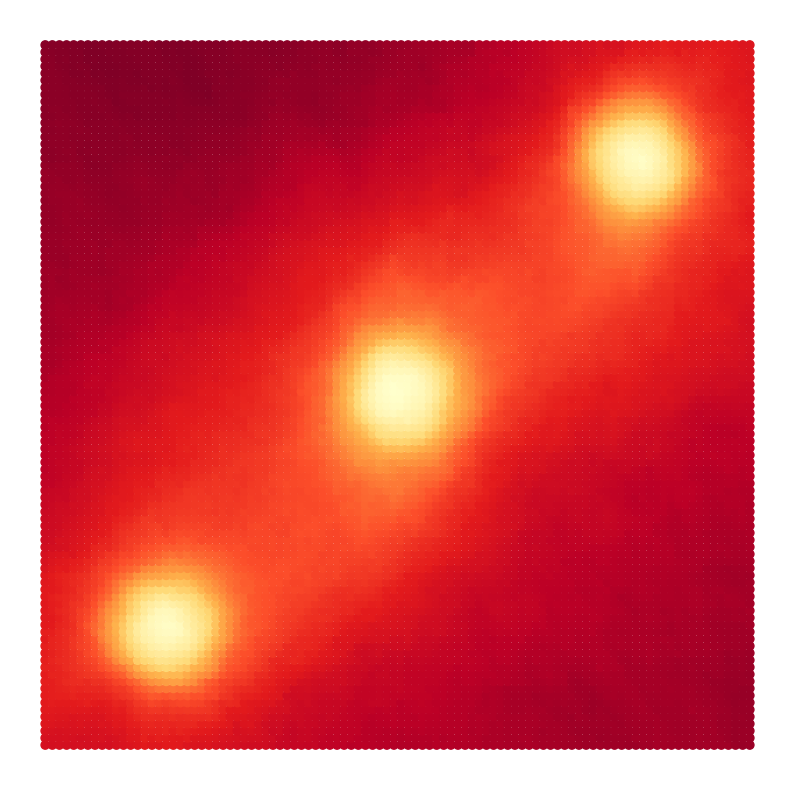

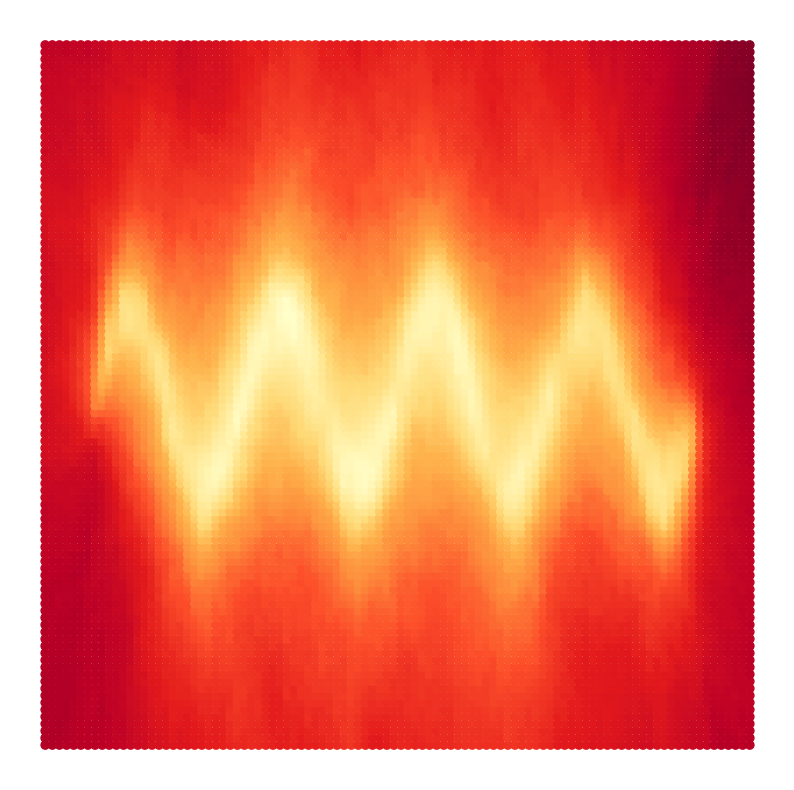

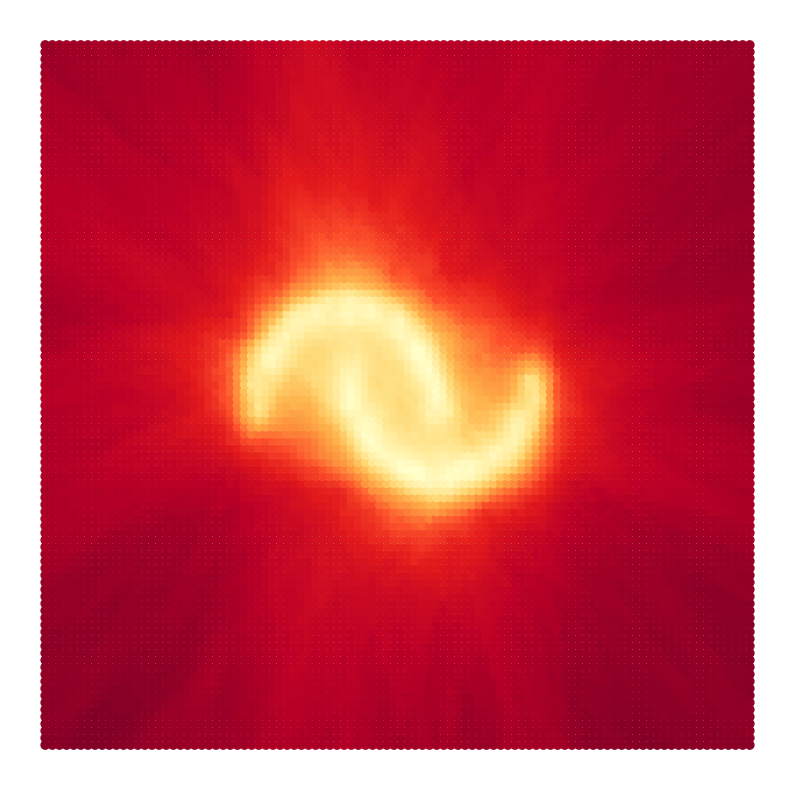

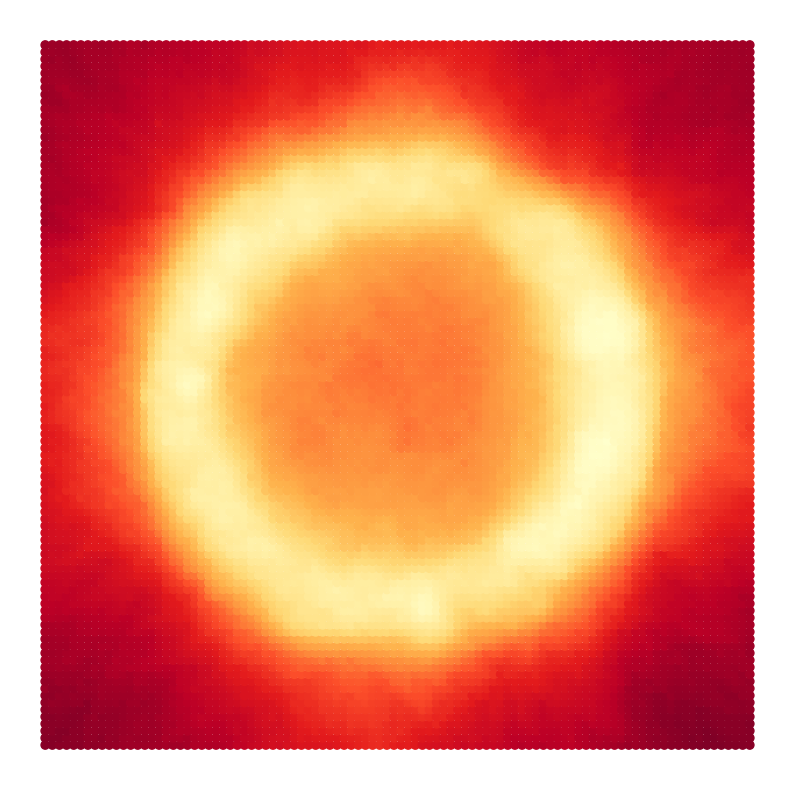

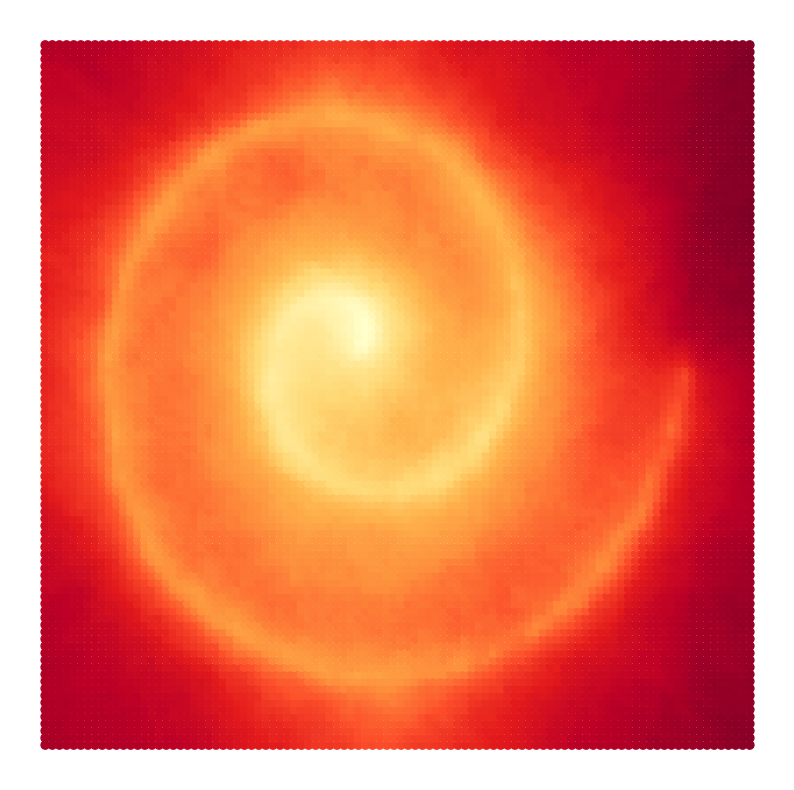

In [19]:
plt.figure(figsize=(10, 10))
plt.scatter(grid_1[:, 0], grid_1[:, 1], c=scores_1, cmap=plt.cm.YlOrRd)
plt.axis("off")
plt.savefig("random_data_eif_300.png")

plt.figure(figsize=(10, 10))
plt.scatter(grid_2[:, 0], grid_2[:, 1], c=scores_2, cmap=plt.cm.YlOrRd)
plt.axis("off")
plt.savefig("three_clusters_eif_300.png")

plt.figure(figsize=(10, 10))
plt.scatter(grid_3[:, 0], grid_3[:, 1], c=scores_3, cmap=plt.cm.YlOrRd)
plt.axis("off")
plt.savefig("sine_wave_eif_300.png")

plt.figure(figsize=(10, 10))
plt.scatter(grid_4[:, 0], grid_4[:, 1], c=scores_4, cmap=plt.cm.YlOrRd)
plt.axis("off")
plt.savefig("moons_eif_300.png")

plt.figure(figsize=(10, 10))
plt.scatter(grid_5[:, 0], grid_5[:, 1], c=scores_5, cmap=plt.cm.YlOrRd)
plt.axis("off")
plt.savefig("donut_eif_300.png")

plt.figure(figsize=(10, 10))
plt.scatter(grid_6[:, 0], grid_6[:, 1], c=scores_6, cmap=plt.cm.YlOrRd)
plt.axis("off")
plt.savefig("spiral_eif_300.png")

Fitting Isolation Forest:   0%|          | 0/100 [00:00<?, ?it/s]

Computing path lengths: 100%|██████████| 10000/10000 [00:09<00:00, 1051.89it/s]


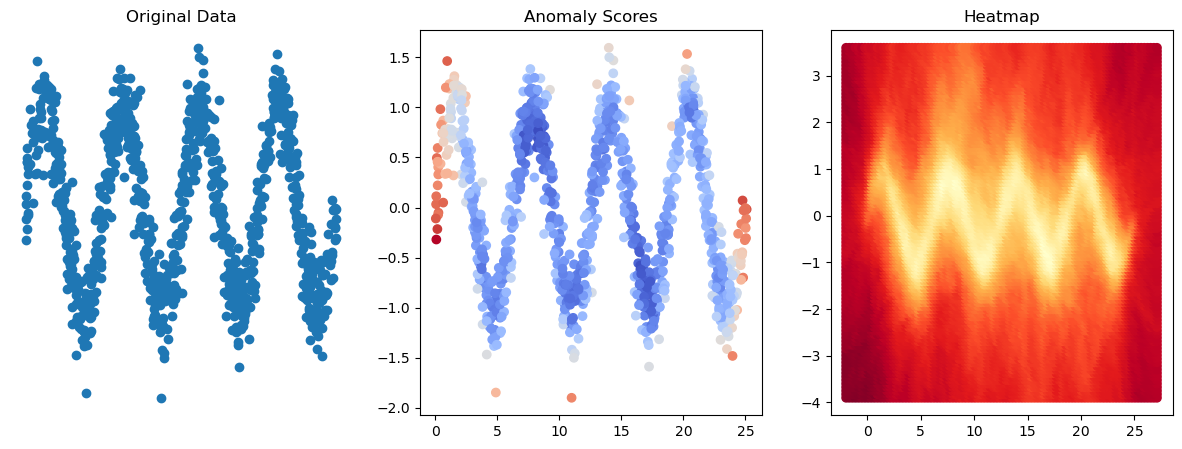

Computing path lengths: 100%|██████████| 10000/10000 [00:02<00:00, 4830.95it/s]


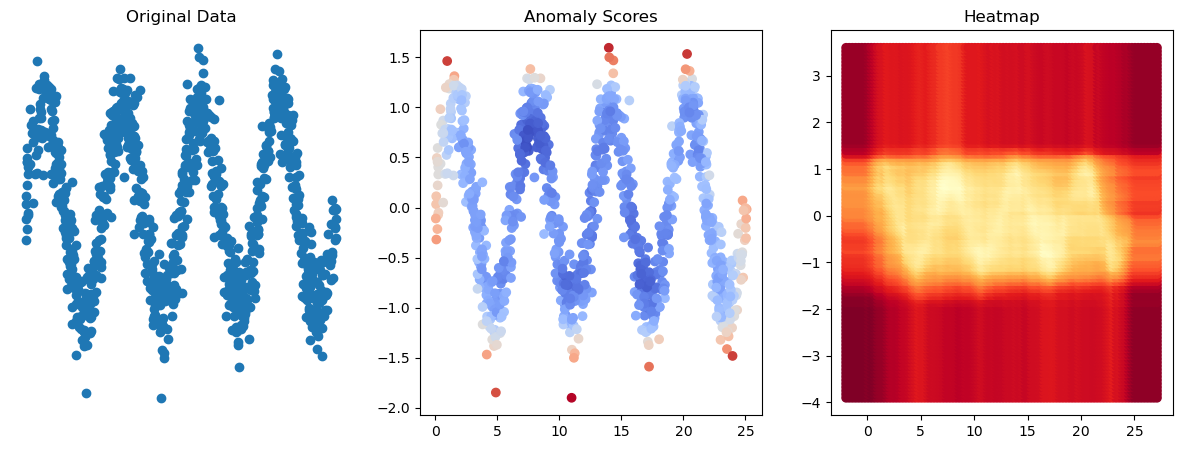

In [79]:
x = np.random.rand(1000) * 8 * np.pi
y = np.sin(x) + np.random.randn(1000) / 4
X = np.c_[x, y]

model = IsolationForest(n_trees=100, sample_size=500, tree_type="extended", tree_args={"extension_level": 2})
evaluate_model(model, X)
model = IsolationForest(n_trees=100, sample_size=500, tree_type="isolation")
evaluate_model(model, X)

Fitting Isolation Forest:   0%|          | 0/100 [00:00<?, ?it/s]

Computing path lengths: 100%|██████████| 10000/10000 [00:07<00:00, 1293.80it/s]


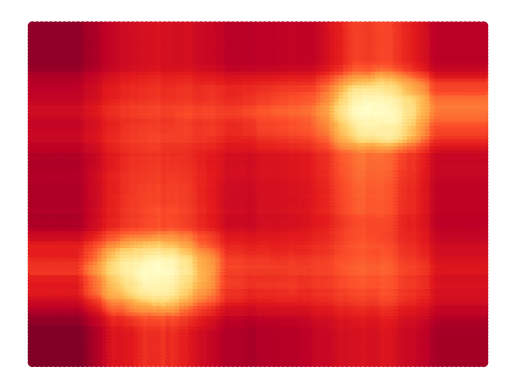

In [94]:
X1 = np.random.randn(500, 2)
X2 = np.random.randn(500, 2) + 10
X = np.vstack([X1, X2])

model = IsolationForest(n_trees=100, sample_size=500, tree_type="extended", tree_args={"extension_level": 1})
evaluate_model(model, X, save_path="two_clusters.png")
# model = IsolationForest(n_trees=100, sample_size=500, tree_type="isolation")
# evaluate_model(model, X)

Fitting Isolation Forest:   0%|          | 0/100 [00:00<?, ?it/s]

Computing path lengths: 100%|██████████| 10000/10000 [00:08<00:00, 1135.67it/s]


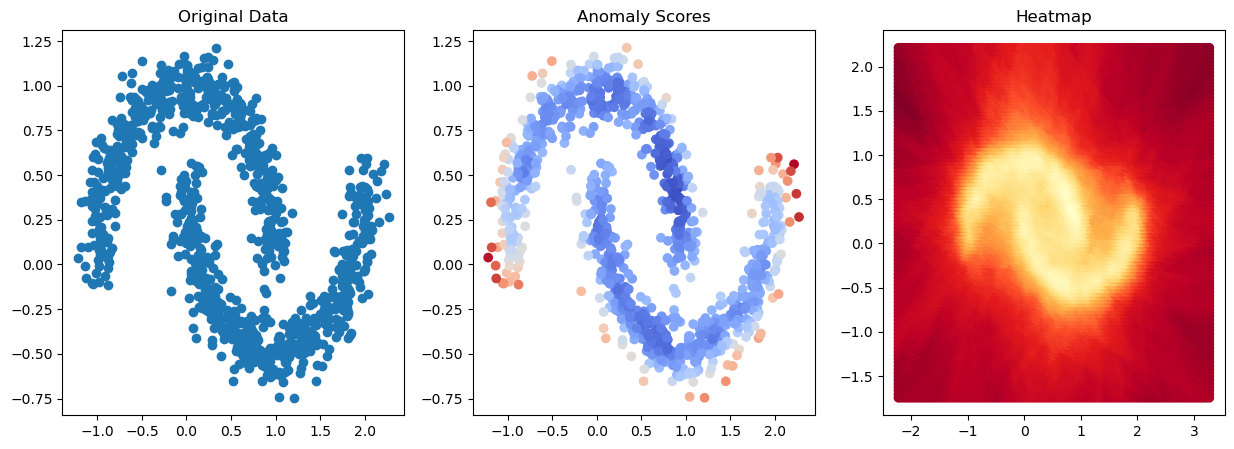

Computing path lengths: 100%|██████████| 10000/10000 [00:02<00:00, 4612.15it/s]


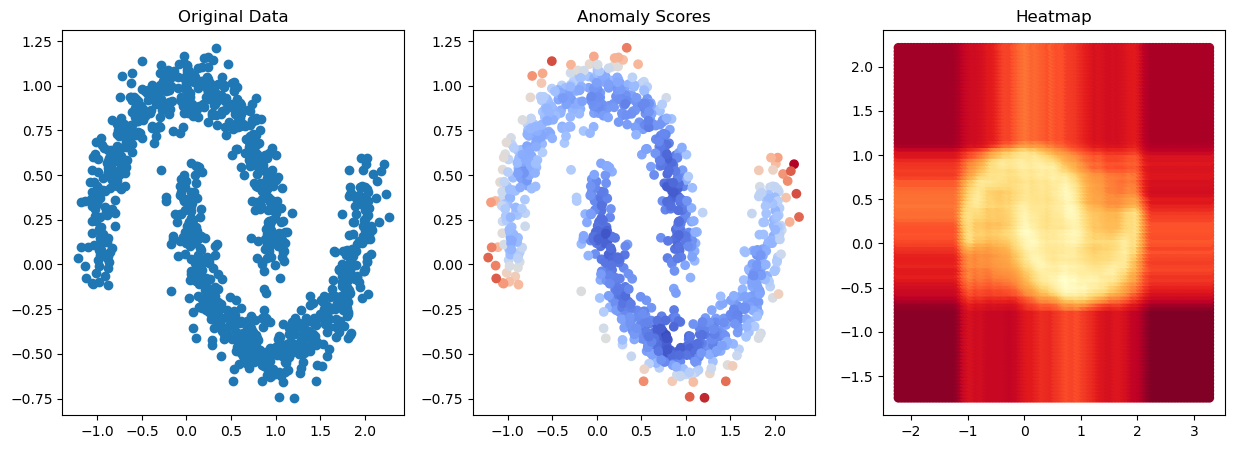

In [21]:
X, _ = make_moons(n_samples=1000, noise=0.1, random_state=42)
model = IsolationForest(n_trees=100, sample_size=500, tree_type="extended", tree_args={"extension_level": 2})
evaluate_model(model, X, offset=1)
model = IsolationForest(n_trees=100, sample_size=500, tree_type="isolation")
evaluate_model(model, X, offset=1)

In [98]:
def generate_donut_data(n_samples=1000, inner_radius=2.0, outer_radius=5.0):
    r = np.random.rand(n_samples) * (outer_radius - inner_radius) + inner_radius
    theta = np.random.rand(n_samples) * 2 * np.pi
    
    X = np.empty((n_samples, 2))
    X[:, 0] = r * np.cos(theta)
    X[:, 1] = r * np.sin(theta)

    return X


X = generate_donut_data(n_samples=1000, inner_radius=4.0, outer_radius=6.0)
model = IsolationForest(n_trees=100, sample_size=500, tree_type="extended", tree_args={"extension_level": 2})
evaluate_model(model, X, offset=1)
model = IsolationForest(n_trees=100, sample_size=500, tree_type="isolation")
evaluate_model(model, X, offset=1)


Computing path lengths: 100%|██████████| 10000/10000 [00:02<00:00, 3795.01it/s]


(array([[-6.88803317, -6.95521908],
        [-6.74915586, -6.95521908],
        [-6.61027855, -6.95521908],
        ...,
        [ 6.58306571,  6.89096502],
        [ 6.72194302,  6.89096502],
        [ 6.86082033,  6.89096502]]),
 [0.693732835469482,
  0.693732835469482,
  0.693732835469482,
  0.693732835469482,
  0.693732835469482,
  0.693732835469482,
  0.693732835469482,
  0.693732835469482,
  0.6924026630949638,
  0.6795927027070803,
  0.6706455052962718,
  0.6705628864963513,
  0.6656359654188043,
  0.6618665484488808,
  0.6652989841201684,
  0.6604568723718875,
  0.66243586690566,
  0.6562858749943369,
  0.6501271668246548,
  0.6481034466501405,
  0.6423879359429074,
  0.6426546238453223,
  0.6404605994534645,
  0.6395365095737253,
  0.6422931625030497,
  0.6426148791716527,
  0.6405037247207367,
  0.6385752559741086,
  0.6332899958869816,
  0.6330688935046604,
  0.6276495280598349,
  0.6275845894359641,
  0.619920781064904,
  0.6167110513003452,
  0.6126850190912396,
  0.616572

In [36]:
X = np.random.randn(2000, 2)
X_anomalies = np.random.uniform(low=-5, high=5, size=(200, 2))
X_test = np.vstack([X, X_anomalies])
y_test = np.hstack([np.zeros(2000), np.ones(200)])

In [21]:
model_extended = IsolationForest(n_trees=100, sample_size=500, tree_type="extended", tree_args={"extension_level": 2})
model_extended.fit(X)
model_isolation = IsolationForest(n_trees=100, sample_size=500, tree_type="isolation")
model_isolation.fit(X)
model_rotation = IsolationForest(n_trees=100, sample_size=500, tree_type="rotation")
model_rotation.fit(X)

anomaly_scores_extended = model_extended.anomaly_score(X)
anomaly_scores_isolation = model_isolation.anomaly_score(X)
anomaly_scores_rotation = model_rotation.anomaly_score(X)

center = X.mean(axis=0)
def generate_concetric_circles(center, radii, n_samples=100):
    circles = []
    for r in radii:
        angles = np.linspace(0, 2 * np.pi, n_samples, endpoint=True)
        circle_x = center[0] + r * np.cos(angles)
        circle_y = center[1] + r * np.sin(angles)
        circle_points = np.c_[circle_x, circle_y]
        circles.append(circle_points)
    return circles

max_radius = np.max(np.linalg.norm(X - center, axis=1)) * 2.5
n_circles = 50
radii = np.linspace(0, max_radius, n_circles)
circles_list = generate_concetric_circles(center, radii, n_samples=100)

Computing path lengths: 100%|██████████| 2000/2000 [00:00<00:00, 2240.43it/s]


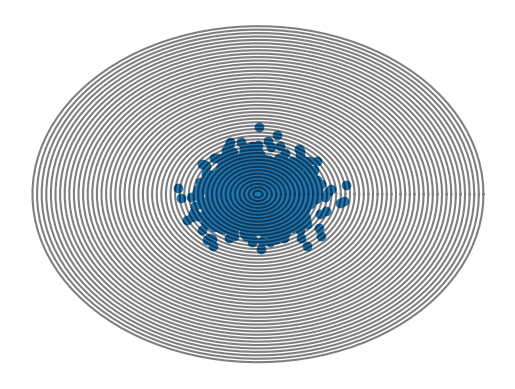

In [24]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis("off")
for circle in circles_list:
    plt.plot(circle[:, 0], circle[:, 1], c="black", alpha=0.5)
plt.savefig("concentric_circles.png")


In [25]:
mean_scores_extended = []
var_scores_extended = []

mean_scores_isolation = []
var_scores_isolation = []

mean_scores_rotation = []
var_scores_rotation = []

for circle in circles_list:
    scores_extended = model_extended.anomaly_score(circle)
    mean_scores_extended.append(np.mean(scores_extended))
    
    var_scores_extended.append(np.var(scores_extended))
    
    scores_isolation = model_isolation.anomaly_score(circle)
    mean_scores_isolation.append(np.mean(scores_isolation))
    var_scores_isolation.append(np.var(scores_isolation))
    
    scores_rotation = model_rotation.anomaly_score(circle)
    mean_scores_rotation.append(np.mean(scores_rotation))
    var_scores_rotation.append(np.var(scores_rotation))

Computing path lengths: 100%|██████████| 100/100 [00:00<00:00, 3717.89it/s]


In [37]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

def compute_auc_scores(y_true, anomaly_scores):
    """
    Returns (roc_auc, pr_auc) given labels and anomaly scores.
    """
    # ROC
    fpr, tpr, _ = roc_curve(y_true, anomaly_scores)
    roc_auc = auc(fpr, tpr)
    
    # Precision-Recall
    precision, recall, _ = precision_recall_curve(y_true, anomaly_scores)
    pr_auc = average_precision_score(y_true, anomaly_scores)
    
    return roc_auc, pr_auc


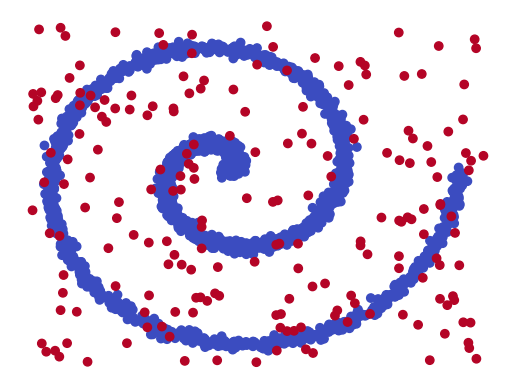

Computing path lengths: 100%|██████████| 2200/2200 [00:02<00:00, 945.81it/s]


Standard IF     : ROC AUC = 0.780, PR AUC = 0.415
Extended IF     : ROC AUC = 0.806, PR AUC = 0.463


In [100]:
# X = np.random.randn(2000, 2)
# X_anomalies = np.random.uniform(low=-5, high=5, size=(200, 2))

# X1 = np.random.randn(1000, 2)
# X2 = np.random.randn(1000, 2) + 10
# X = np.vstack([X1, X2])
# X_anomalies = np.random.uniform(low=-5, high=15, size=(200, 2))

# x = np.random.rand(2000) * 8 * np.pi
# y = np.sin(x) + np.random.randn(2000) / 4
# X = np.c_[x, y]
# X_anomalies = np.random.uniform(low=[xmn - offset, ymn - offset], high=[xmx + offset, ymx + offset], size=(200, 2))

# generate moons
# X, _ = make_moons(n_samples=2000, noise=0.1, random_state=42)

# generate donut
# X = generate_donut_data(n_samples=2000, inner_radius=4.0, outer_radius=6.0)

# generate spiral
X = generate_spiral(n_samples=2000, noise=0.2)

xmn = np.min(X[:, 0])
xmx = np.max(X[:, 0])
ymn = np.min(X[:, 1])
ymx = np.max(X[:, 1])
offset = 1
X_anomalies = np.random.uniform(low=[xmn - offset, ymn - offset], high=[xmx + offset, ymx + offset], size=(200, 2))


X_test = np.vstack([X, X_anomalies])
y_test = np.hstack([np.zeros(X.shape[0]), np.ones(X_anomalies.shape[0])])

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm")
plt.axis("off")
plt.show()

model_extended = IsolationForest(n_trees=100, sample_size=256, tree_type="extended", tree_args={"extension_level": 2})
model_extended.fit(X)
model_isolation = IsolationForest(n_trees=100, sample_size=256, tree_type="extended", tree_args={"extension_level": 1})
model_isolation.fit(X)
# model_rotation = IsolationForest(n_trees=100, sample_size=500, tree_type="rotation")
# model_rotation.fit(X)

anomaly_scores_extended = model_extended.anomaly_score(X_test)
anomaly_scores_isolation = model_isolation.anomaly_score(X_test)
# anomaly_scores_rotation = model_rotation.anomaly_score(X_test)

roc_auc_ext, pr_auc_ext = compute_auc_scores(y_test, anomaly_scores_extended)
roc_auc_iso, pr_auc_iso = compute_auc_scores(y_test, anomaly_scores_isolation)
# roc_auc_rot, pr_auc_rot = compute_auc_scores(y_test, anomaly_scores_rotation)

print(f"Standard IF     : ROC AUC = {roc_auc_iso:.3f}, PR AUC = {pr_auc_iso:.3f}")
print(f"Extended IF     : ROC AUC = {roc_auc_ext:.3f}, PR AUC = {pr_auc_ext:.3f}")
# print(f"Rotated IF      : ROC AUC = {roc_auc_rot:.3f}, PR AUC = {pr_auc_rot:.3f}")


In [65]:
anomaly_scores_extended = model_extended.anomaly_score(X)
anomaly_scores_isolation = model_isolation.anomaly_score(X)
anomaly_scores_rotation = model_rotation.anomaly_score(X)

Computing path lengths: 100%|██████████| 1000/1000 [00:00<00:00, 2229.24it/s]


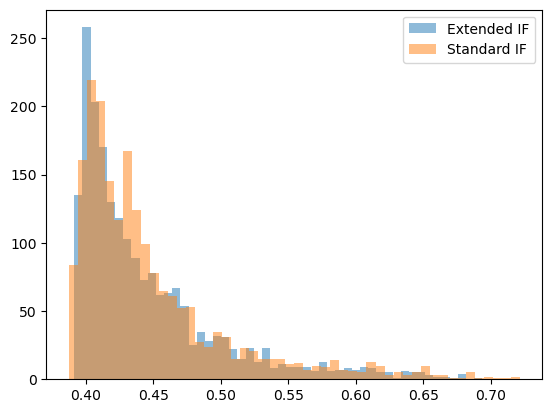

In [32]:
# draw in the same plot anomaly_scores_extended and anomaly_scores_isolation as histograms
plt.hist(anomaly_scores_extended, bins=50, alpha=0.5, label="Extended IF")
plt.hist(anomaly_scores_isolation, bins=50, alpha=0.5, label="Standard IF")
# plt.hist(anomaly_scores_rotation, bins=50, alpha=0.5, label="Rotated IF")
plt.legend()
plt.savefig("histograms.png")


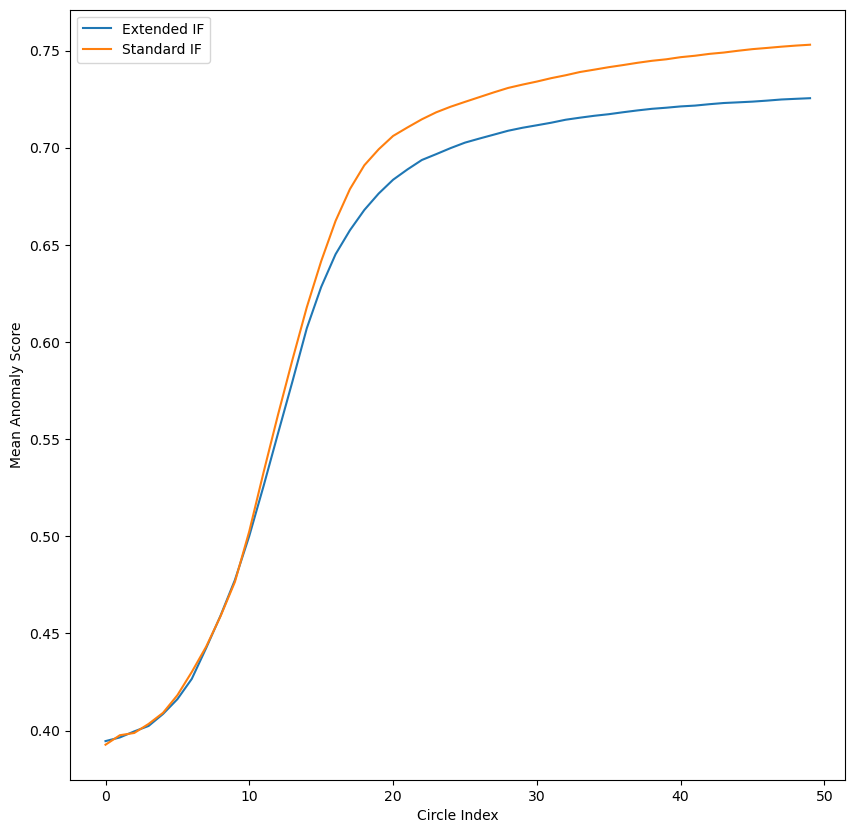

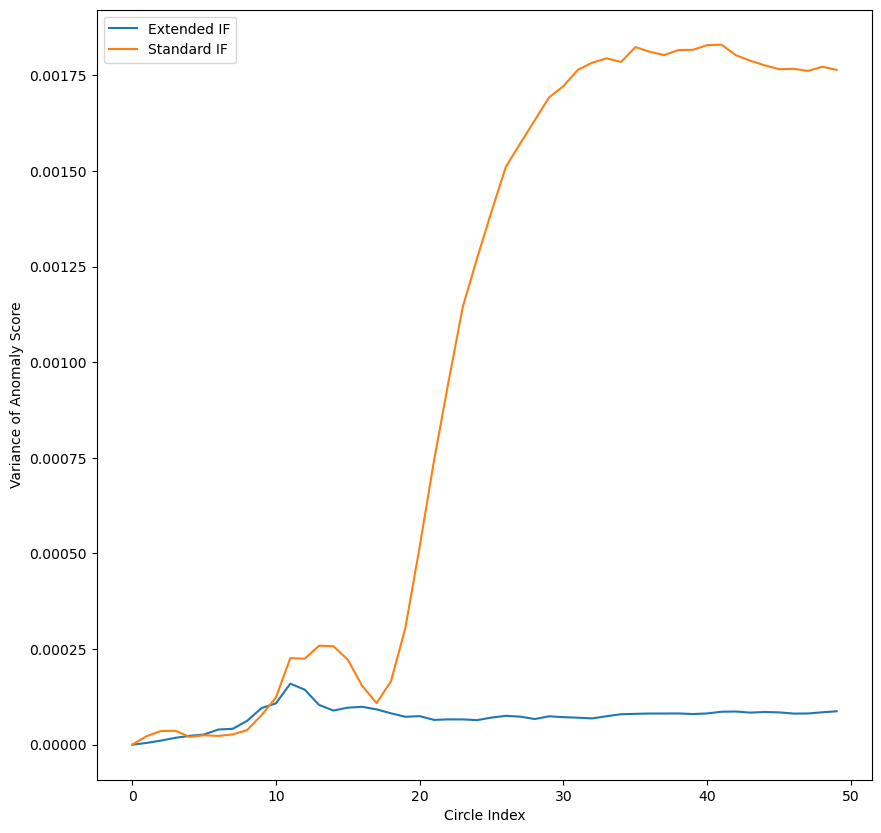

In [31]:
# draw in the same figure two subplots, one with mean of extended and standard IF, and the other with variances
# plt.figure(figsize=(15, 5))
plt.figure(figsize=(10, 10))
plt.plot(mean_scores_extended, label="Extended IF")
plt.plot(mean_scores_isolation, label="Standard IF")
# plt.plot(mean_scores_rotation, label="Rotated IF")
plt.xlabel("Circle Index")
plt.ylabel("Mean Anomaly Score")
plt.legend()
plt.savefig("mean_scores.png")

plt.figure(figsize=(10, 10))
plt.plot(var_scores_extended, label="Extended IF")
plt.plot(var_scores_isolation, label="Standard IF")
# plt.plot(var_scores_rotation, label="Rotated IF")
plt.xlabel("Circle Index")
plt.ylabel("Variance of Anomaly Score")
plt.legend()
plt.savefig("var_scores.png")


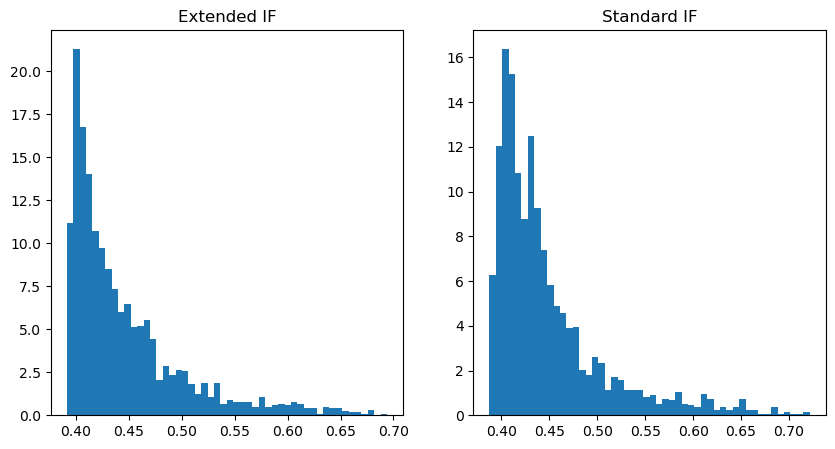

In [26]:

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(anomaly_scores_extended, bins=50, density=True)
ax[0].set_title("Extended IF")
ax[1].hist(anomaly_scores_isolation, bins=50, density=True)
ax[1].set_title("Standard IF")
# ax[2].hist(anomaly_scores_rotation, bins=50, density=True)
# ax[2].set_title("Rotation")
plt.show()

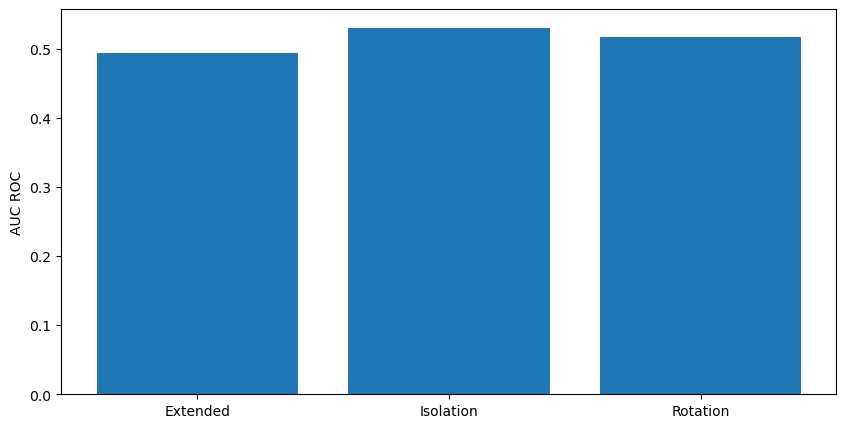

In [68]:
# compute AUC ROC for the one blob cluster
from sklearn.metrics import roc_auc_score

y_true = np.zeros(1000)
y_true[:50] = 1

auc_extended = roc_auc_score(y_true, anomaly_scores_extended)
auc_isolation = roc_auc_score(y_true, anomaly_scores_isolation)
auc_rotation = roc_auc_score(y_true, anomaly_scores_rotation)

plt.figure(figsize=(10, 5))
plt.bar(["Extended", "Isolation", "Rotation"], [auc_extended, auc_isolation, auc_rotation])
plt.ylabel("AUC ROC")
plt.show()



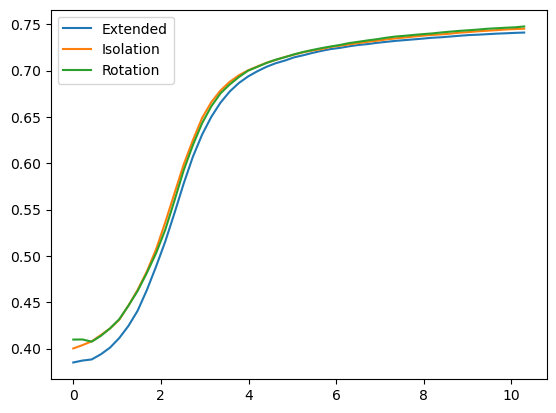

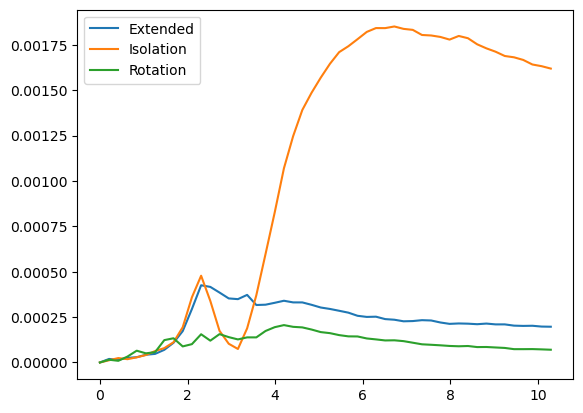

In [53]:
plt.plot(radii, mean_scores_extended, label="Extended")
plt.plot(radii, mean_scores_isolation, label="Isolation")
plt.plot(radii, mean_scores_rotation, label="Rotation")
plt.legend()
plt.show()


plt.plot(radii, var_scores_extended, label="Extended")
plt.plot(radii, var_scores_isolation, label="Isolation")
plt.plot(radii, var_scores_rotation, label="Rotation")
plt.legend()
plt.show()


In [97]:
def generate_spiral(n_samples=1000, noise=0.2):
    t = np.linspace(0, 4*np.pi, n_samples)
    x = t * np.cos(t) + np.random.randn(n_samples) * noise
    y = t * np.sin(t) + np.random.randn(n_samples) * noise
    return np.c_[x, y]

X = generate_spiral()

model = IsolationForest(n_trees=100, sample_size=500, tree_type="extended", tree_args={"extension_level": 2})
evaluate_model(model, X, offset=1)
model = IsolationForest(n_trees=100, sample_size=500, tree_type="isolation")
evaluate_model(model, X, offset=1)

Computing path lengths: 100%|██████████| 10000/10000 [00:02<00:00, 3950.51it/s]


(array([[-10.9501531 , -12.59235415],
        [-10.69918997, -12.59235415],
        [-10.44822685, -12.59235415],
        ...,
        [ 13.39327025,   9.19601426],
        [ 13.64423337,   9.19601426],
        [ 13.8951965 ,   9.19601426]]),
 [0.685882305314675,
  0.685882305314675,
  0.685882305314675,
  0.685882305314675,
  0.685882305314675,
  0.6801604080449648,
  0.6649528289891055,
  0.6638369925676721,
  0.6573514017844733,
  0.6579769709507811,
  0.659553749909469,
  0.6607521220373691,
  0.6576699515721262,
  0.6564903922769284,
  0.6550359128781648,
  0.6545534755046272,
  0.6604550404404387,
  0.6504940317243659,
  0.6464270500455713,
  0.6418892917256028,
  0.6421516740383116,
  0.6388102040052837,
  0.6362074203201318,
  0.6305514271875786,
  0.6324408129747008,
  0.6289678185507201,
  0.6293442957215875,
  0.6285135629938793,
  0.6246996600035188,
  0.6235553164795047,
  0.6239285539242573,
  0.6195665045512712,
  0.6198054041858098,
  0.6207100276905568,
  0.61637580394